In [25]:
# 导入包
import music21
from colorChord import *

In [26]:
# music21映射到colorChord
def map_music21(chord_21):
    map_21 = {'A': cNote.A,
            'D': cNote.D,
            'G': cNote.G,
            'C': cNote.C,
            'F': cNote.F,
            'B-': cNote.Bb,
            'E-': cNote.Eb,
            'G#': cNote.Ab,
            'C#': cNote.Db,
            'F#': cNote.Fsharp,
            'B': cNote.B,
            'E': cNote.E}
    temp = []
    for i in chord_21.notes:
        temp.append(map_21[i.name])
    
    return Chord(temp)

In [27]:
# 读取midi文件
midi = music21.converter.parse(r'C:\Users\Administrator\Desktop\totoro.mid')  # 将这里的路径改为自己的midi路径
chords = midi.chordify().flat.getElementsByClass(music21.chord.Chord) 

In [28]:
# 开始转换
chord_name_ls = []
color_chord_ls = []
for chord in chords:
    chord_name_ls.append(chord.pitchedCommonName)
    color_chord_ls.append(map_music21(chord))   

In [29]:
# 开始分析
color_change_ls = [0]
tension_change_ls = [0]
freshness_ls = [0]

for i in range(len(chord_name_ls) - 1):
    a = color_chord_ls[i]
    b = color_chord_ls[i+1]
    color_change_ls.append(Chord.get_color_change色彩变化(a, b))
    tension_change_ls.append(Chord.get_tension_change紧张度变化(a, b))
    freshness_ls.append(Chord.get_fressness新鲜度(a, b))

In [30]:
# 生成dataframe
import pandas as pd
df = pd.DataFrame({
    'chord_name': chord_name_ls,
    'color_change': color_change_ls,
    'tension_change': tension_change_ls,
    'freshness': freshness_ls})

<AxesSubplot:>

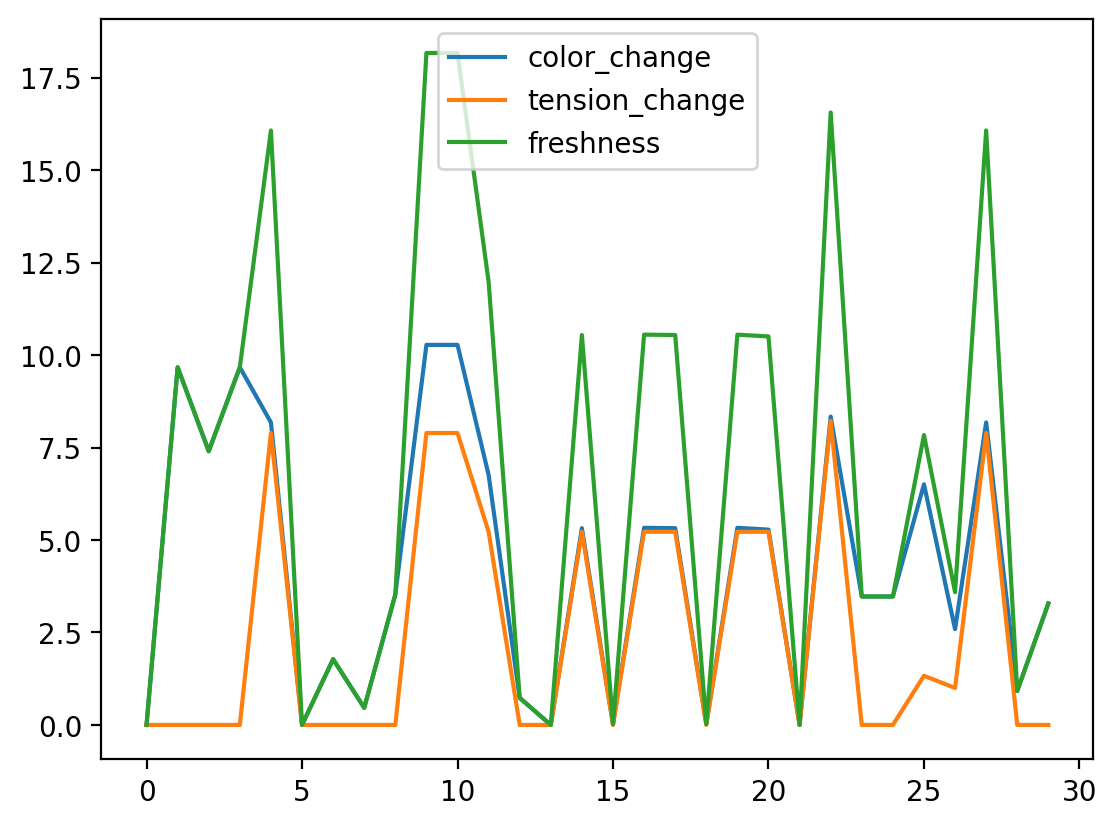

In [31]:
# 查看前30小节
df[df.columns[1:]][:30].plot(kind='line')

In [32]:
# 保存为csv文件,excel可以打开
df.to_csv('分析结果.csv')